In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/task-rapp/palm_ffb.csv
/kaggle/input/task-rapp/ingredient.csv


In [2]:
import numpy as np 
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# **QUESTION 1**

Importing the data, having initial look on the dataset and looking for null values.

In [3]:
df = pd.read_csv('/kaggle/input/task-rapp/ingredient.csv', delimiter=',')
df.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [4]:
df.isnull().sum()

a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    0
dtype: int64

The dataset is clear from null values, and proceed with further exploration

## **QUESTION 1a. (Descriptive Anlysis,Correlation and Anova)**

### **Descriptive Analysis**

In [5]:
df.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


**Findings:**
* ingredient a, e have relatively low standard deviation compared to it's means *(Could be eliminated)*
* ingredient a, b, d, e, g is a must-have in the formula
* ingredient c, f ,h ,i are optionals since it has a minimum value of zero *(Couldn't be eliminated since it's important for clustering)*
* some ingredients have higher means compared to the rest *(Normalized data needed)*

To see better on how each standard deviation interacts with each ingredient respective mean, I normalized the data by MinMax method

In [6]:
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df.describe()

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,0.316744,0.402684,0.597891,0.359784,0.507310,0.080041,0.327785,0.055570,0.111783
std,0.133313,0.122798,0.321249,0.155536,0.138312,0.105023,0.132263,0.157847,0.191056
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.235843,0.327444,0.471047,0.280374,0.441071,0.019726,0.261152,0.000000,0.000000
50%,0.286655,0.386466,0.775056,0.333333,0.532143,0.089372,0.294610,0.000000,0.000000
75%,0.351514,0.465414,0.801782,0.417445,0.585268,0.098229,0.347816,0.000000,0.196078
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Findings:**
* h and i has high concentration in the near-zero value, eavluated from it's Q1, Q2 and Q3 value *(Might need some kind of transformation)* 

### **Correlation Analysis**

In [7]:
corr = normalized_df.corr()
corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  # This is added back by InteractiveShellApp.init_path()


,a,b,c,d,e,f,g,h,i
a,nan,nan,nan,nan,nan,nan,nan,nan,nan
b,-0.19,nan,nan,nan,nan,nan,nan,nan,nan
c,-0.12,-0.27,nan,nan,nan,nan,nan,nan,nan
d,-0.41,0.16,-0.48,nan,nan,nan,nan,nan,nan
e,-0.54,-0.07,-0.17,-0.01,nan,nan,nan,nan,nan
f,-0.29,-0.27,0.01,0.33,-0.19,nan,nan,nan,nan
g,0.81,-0.28,-0.44,-0.26,-0.21,-0.32,nan,nan,nan
h,-0.00,0.33,-0.49,0.48,-0.10,-0.04,-0.11,nan,nan
i,0.14,-0.24,0.08,-0.07,-0.09,-0.01,0.12,-0.06,nan


**Findings:** 
From the correlation plot, I would like to classify each relations into some groups:
* High Positive Correlation (>0,75):
1. a and g
* High Negative Correlation (<-0,75):
1. None
* Moderate Positive Correlation (0,25<x<0,75):
1. b and h
1. d and f
1. d and h
* Moderate Negative Correlation (-0,75<x<-0,25):
1. a and d
1. a and e
1. a and f
1. b and c
1. b and f
1. b and g
1. c and d
1. c and g
1. c and h
1. d and g
* And the rest could be classified as uncorrelated


* High negatively correlated ingredients might mean interchangeable subtances on the formula *(eventhough they're interchangeable they could be clustered into two different groups, so I chose to retain the data with this kind of correlation)*
* High positively correlated ingredients might mean redundancy on the factors/variables and can be reduced to a single variable *(I eliminate a since it has high correlation with g, strengthening the previous argument to eliminate a)*


## **QUESTION 1b. (Graphical Analysis and Distribution Study)**

### **Graphical Analysis**

Making density plots and histograms of each variable

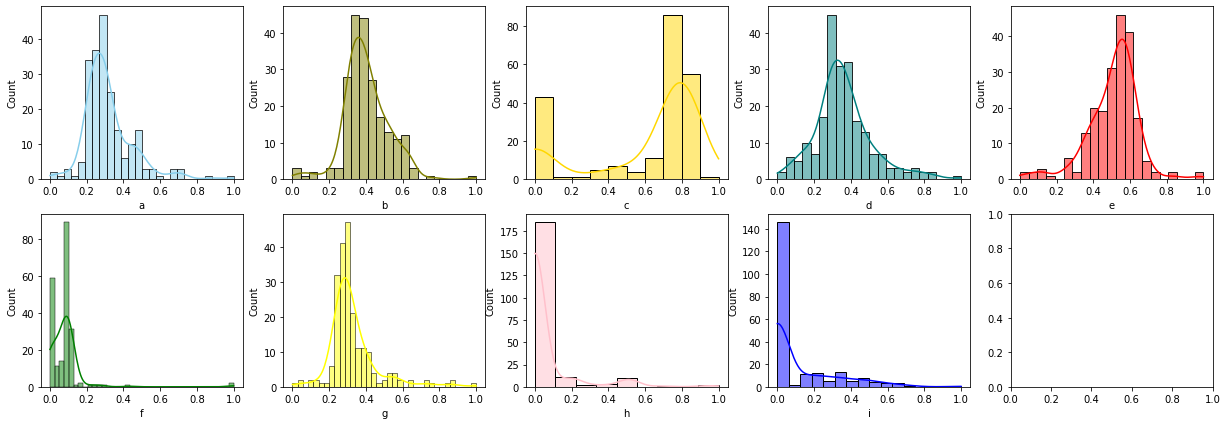

In [8]:
fig, axs = plt.subplots(2, 5, figsize=(21, 7))

sns.histplot(data=normalized_df, x="a", kde=True,color="skyblue", ax=axs[0, 0])
sns.histplot(data=normalized_df, x="b", kde=True,color="olive", ax=axs[0, 1])
sns.histplot(data=normalized_df, x="c", kde=True,color="gold", ax=axs[0, 2])
sns.histplot(data=normalized_df, x="d", kde=True,color="teal", ax=axs[0, 3])
sns.histplot(data=normalized_df, x="e", kde=True,color="red", ax=axs[0, 4])
sns.histplot(data=normalized_df, x="f", kde=True,color="green", ax=axs[1, 0])
sns.histplot(data=normalized_df, x="g", kde=True,color="yellow", ax=axs[1, 1])
sns.histplot(data=normalized_df, x="h", kde=True,color="pink", ax=axs[1, 2])
sns.histplot(data=normalized_df, x="i", kde=True,color="blue", ax=axs[1, 3])

plt.show()

Making boxplots of each variable

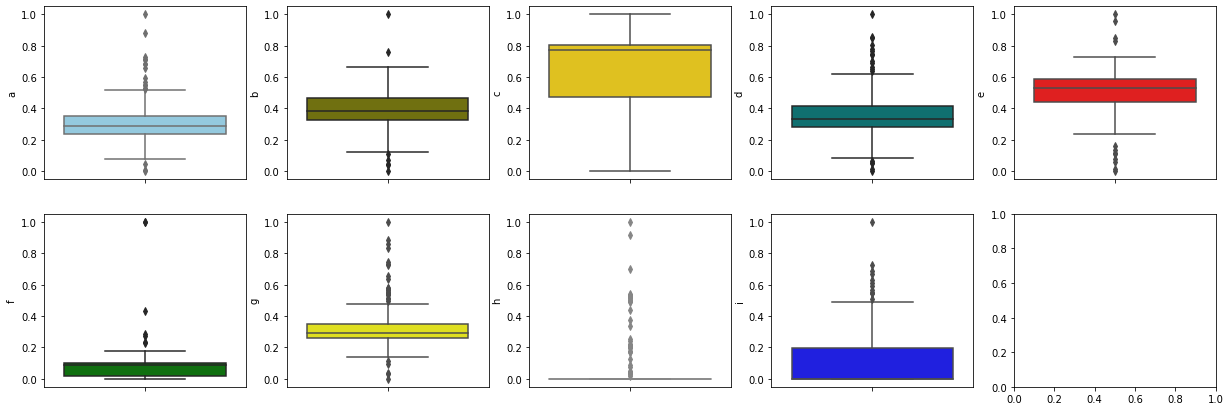

In [9]:
fig, axs = plt.subplots(2, 5, figsize=(21, 7))

sns.boxplot(data=normalized_df, y="a",color="skyblue", ax=axs[0, 0])
sns.boxplot(data=normalized_df, y="b",color="olive", ax=axs[0, 1])
sns.boxplot(data=normalized_df, y="c",color="gold", ax=axs[0, 2])
sns.boxplot(data=normalized_df, y="d",color="teal", ax=axs[0, 3])
sns.boxplot(data=normalized_df, y="e",color="red", ax=axs[0, 4])
sns.boxplot(data=normalized_df, y="f",color="green", ax=axs[1, 0])
sns.boxplot(data=normalized_df, y="g",color="yellow", ax=axs[1, 1])
sns.boxplot(data=normalized_df, y="h",color="pink", ax=axs[1, 2])
sns.boxplot(data=normalized_df, y="i",color="blue", ax=axs[1, 3])

plt.show()


Making scatterplot matrix

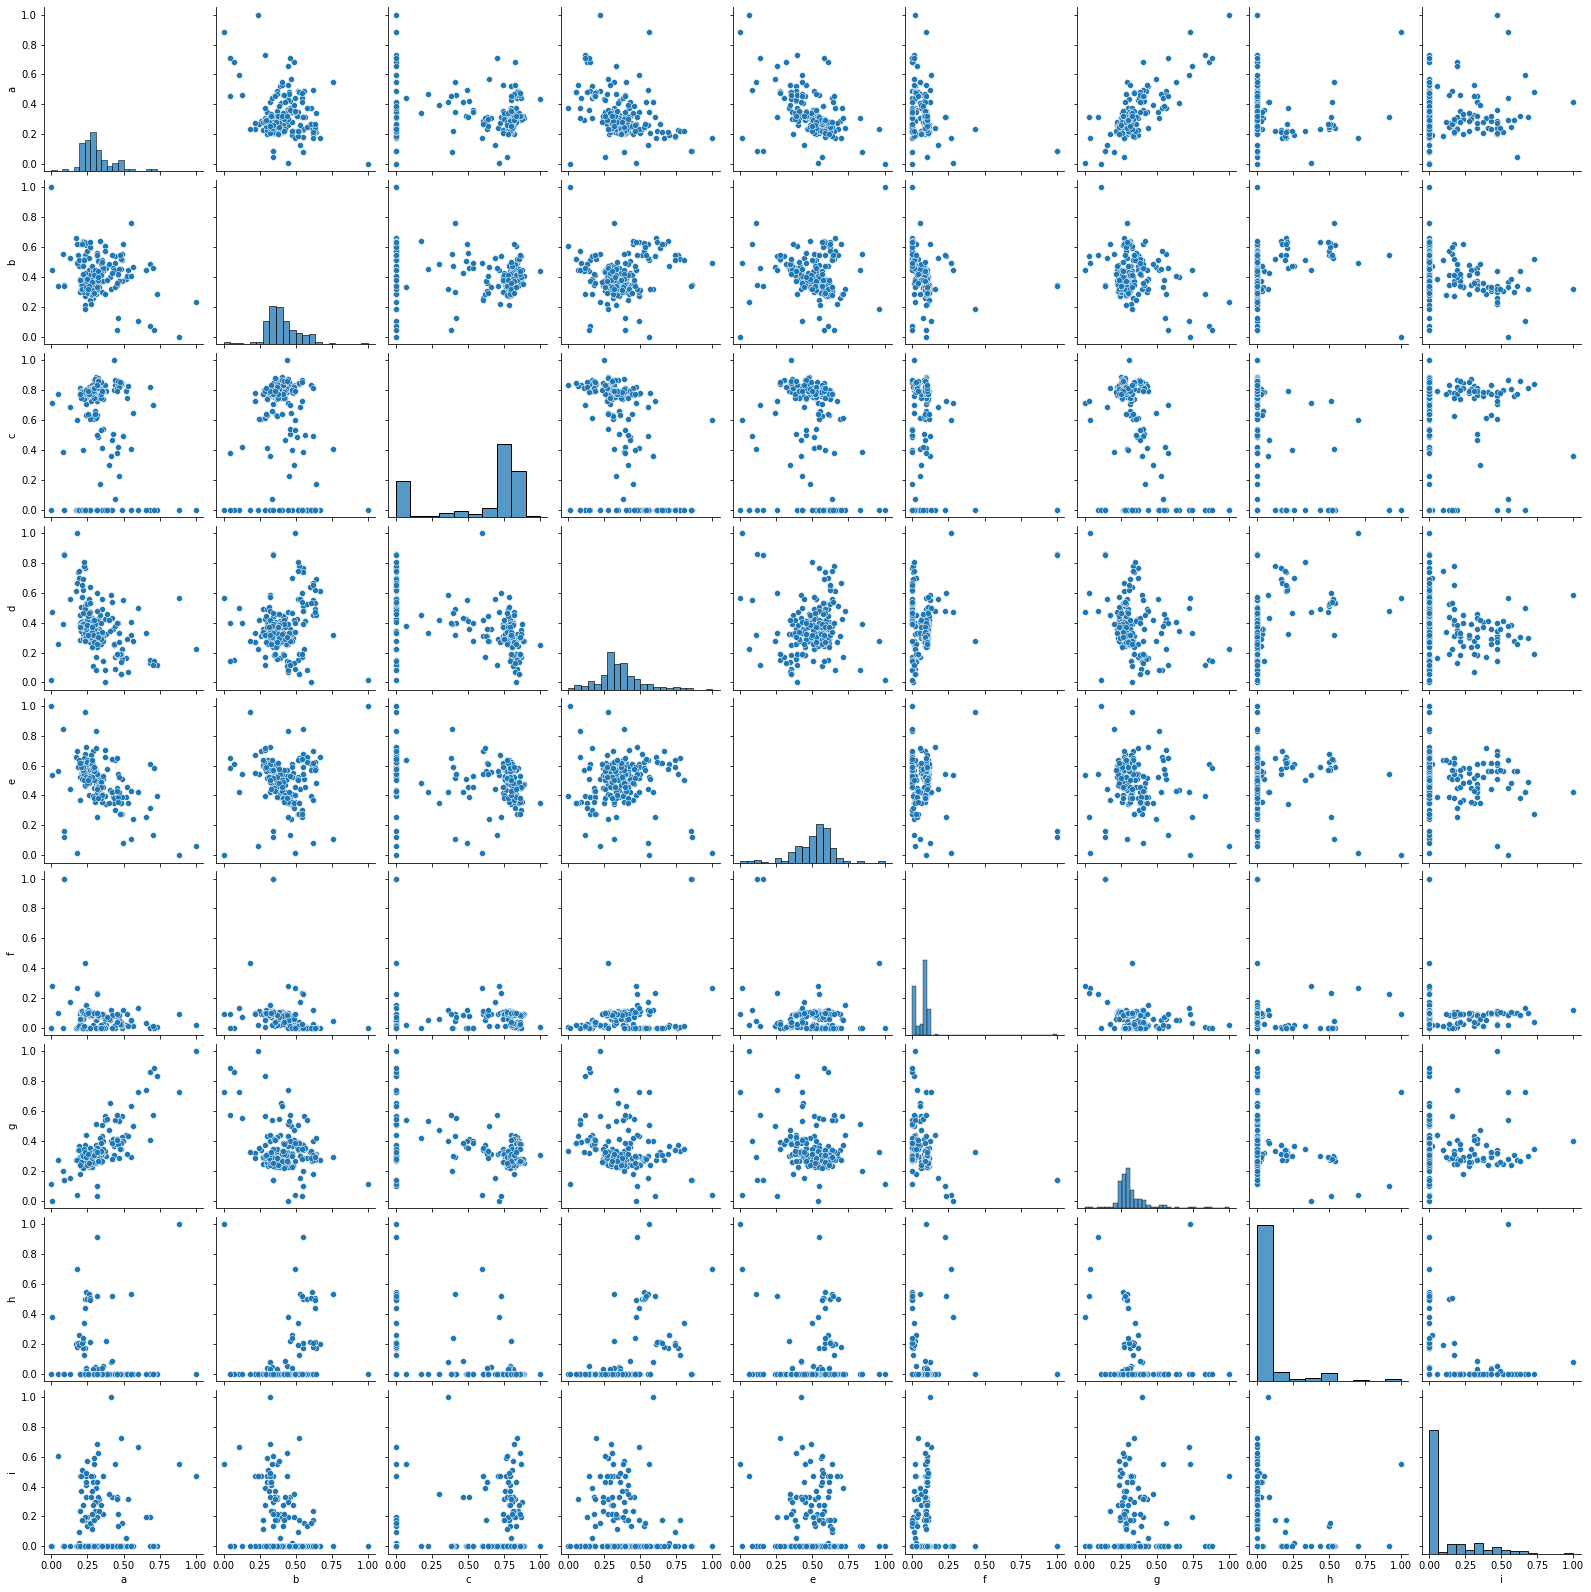

In [10]:
sns.pairplot(normalized_df)

**Findings:** 

From the density and histogram plots
* visually the ingredients a, b, d, and g are right-skewed
* visually the ingredient e is left-skewed *(The skewed ones are fine but transformation is needed to reduce their tails)*
* visually the ingredients h and i are zero-inflated *(This property is important in this problem so I let them be)*
* visually the ingredient c and f is zero-inflated and bi-modal *(This property is important in this problem so I let them be)*

From the boxplots and pair plots
* almost all of the ingredients has notable outliers *(Getting rid of the outliers as it may affect the analysis. e.g. as in ingredient f where the bi-modality nature of the data wasn't showing due to outliers)*
* in b >0.8 
* in d >0.8
* in f >0.4
* in h >0.6
* in i >0.8

## **QUESTION 1c. (Unsupervised Clustering)**

### **Transforming the Dataset**

From what we had explored on the previous questions, there some notable properties that we got:
* some ingredients have higher means compared to the rest ->*Normalized dataset is needed to eliminate biases on distance measurements*
* ingredient c, f ,h ,i are optionals since it has a minimum value of zero -> *This variables can't be reduced since the nature of dataset made zero inflated variable even more valuable*
* ingredients a and e have a low standard deviation -> *they can be eliminated since there are no relevant changes in quantity*
* a and g have high positive correlation -> *one of them could be eliminated to eliminate redundancy*
* visually the ingredients h and i are zero-inflated  -> *this variables can't be reduced since the nature of dataset made zero inflated variable even more valuable*
* visually the ingredient c and f are bi-modal and zero-inflated -> *no transformation needed since the nature of dataset made bi-modal variable even more valuable*
* almost all of the ingredients had lots of outliers -> *this might be due to the tweaking of contents, reducing some of the data is needed to strengthen some characteritics that a feature has*



**Transformation that is going to be done:**
* Eliminate ingredient a and e 
* Normalized the data by it's Min and Max value to retain the zero inflated-ness
* Eliminate some of the data that's an outlier

In [11]:
# using normalized_df instead of df
# eliminating ingredients a and e
normalized_df = normalized_df.drop(['a','e'],axis=1)
# filtering the data from outliers
normalized_df = normalized_df[normalized_df['b'] <= 0.8]
normalized_df = normalized_df[normalized_df['d'] <= 0.8]
normalized_df = normalized_df[normalized_df['f'] <= 0.15]
normalized_df = normalized_df[normalized_df['g'] <= 0.8]
normalized_df = normalized_df[normalized_df['h'] <= 0.6]
normalized_df = normalized_df[normalized_df['i'] <= 0.8]

In [12]:
normalized_df=(normalized_df-normalized_df.min())/(normalized_df.max()-normalized_df.min())
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 212
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   b       197 non-null    float64
 1   c       197 non-null    float64
 2   d       197 non-null    float64
 3   f       197 non-null    float64
 4   g       197 non-null    float64
 5   h       197 non-null    float64
 6   i       197 non-null    float64
dtypes: float64(7)
memory usage: 12.3 KB


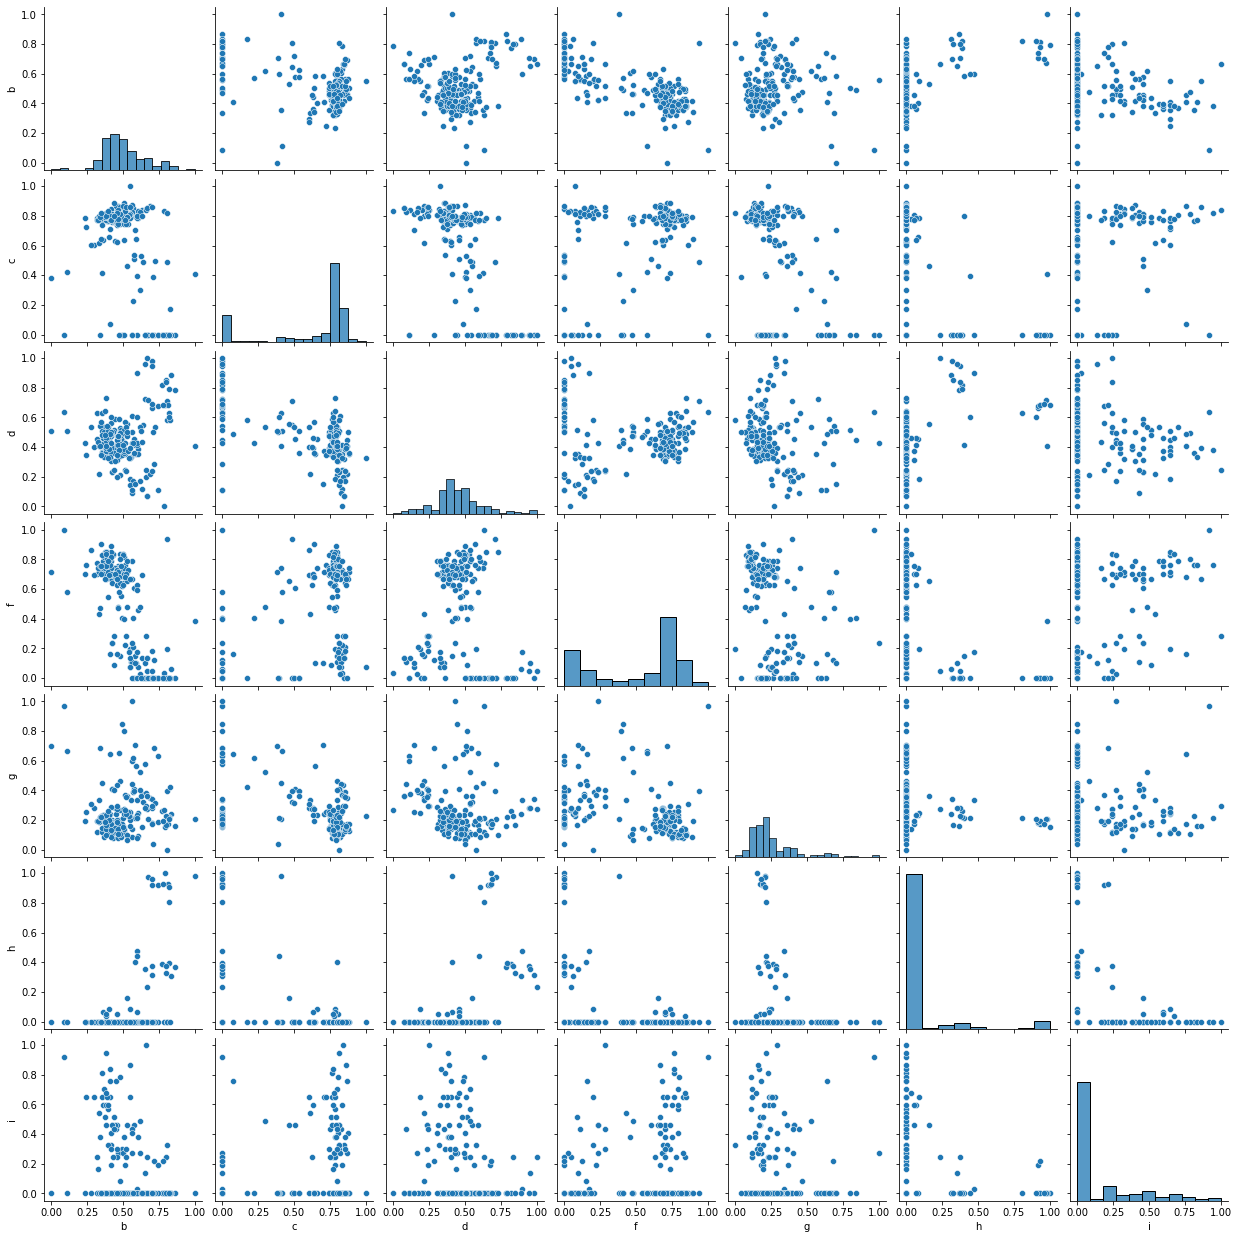

In [13]:
sns.pairplot(normalized_df)

**Findings after Transformation:** 
Seems like the dataset is where i wanted it to be, and I'll proceed with the clustering

### **Using K-Means Clustering and Elbow Method to find number of clusters**

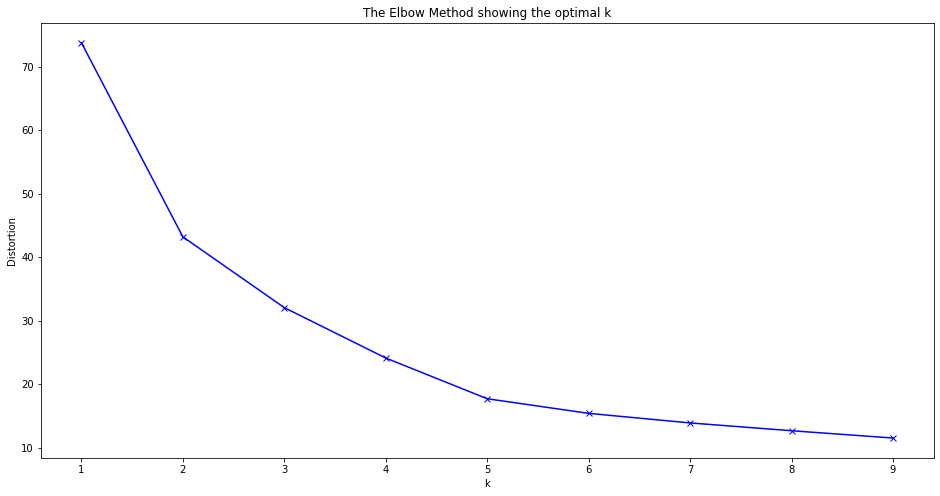

In [14]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


x_array = np.array(normalized_df)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(x_scaled)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


**Finding:** k=5 is visually being the elbow, I'll use 5 cluster

### **Using the Dendogram to get intuitive with the result**

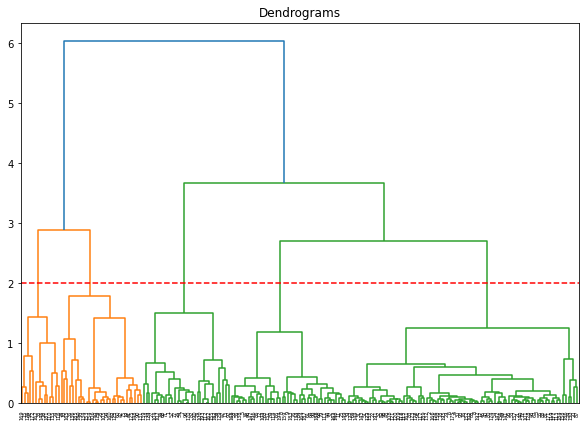

In [15]:
from sklearn.preprocessing import normalize
data_scaled = normalize(normalized_df)
data_scaled = pd.DataFrame(data_scaled, columns=normalized_df.columns)
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=2, color='r', linestyle='--')

**Findings:** Seems like the dendogram goes hand in hand with the KMeans, I'll continue to group them into 5 clusters

### **Conclusion**

Finding the centroids of each cluster to have better look on what properties does each cluster has

In [16]:
kmeans = KMeans(n_clusters = 5, random_state=123)
kmeans.fit(x_scaled)
cc = kmeans.cluster_centers_
print(cc)

[[4.29446779e-01 7.65404603e-01 4.08888889e-01 7.04046639e-01
  2.03718933e-01 1.00714750e-02 5.62312312e-01]
 [7.57925898e-01 3.65458595e-02 7.63090909e-01 3.70370370e-02
  2.23833732e-01 6.22009569e-01 4.79115479e-02]
 [5.87864558e-01 7.71387397e-01 2.76235294e-01 1.18010167e-01
  3.33494582e-01 1.44478844e-02 1.20826709e-01]
 [4.79779412e-01 9.82739421e-02 4.64000000e-01 3.47222222e-01
  6.89453125e-01 2.77555756e-17 1.65540541e-01]
 [4.43654990e-01 7.72002703e-01 4.49797753e-01 7.25898183e-01
  1.73048492e-01 1.64268349e-03 2.39902824e-02]]


In [17]:
df_cc = pd.DataFrame(cc, columns=['b','c','d','f','g','h','i'])
df_cc

,b,c,d,f,g,h,i
0,0.429447,0.765405,0.408889,0.704047,0.203719,1.007147e-02,0.562312
1,0.757926,0.036546,0.763091,0.037037,0.223834,6.220096e-01,0.047912
2,0.587865,0.771387,0.276235,0.118010,0.333495,1.444788e-02,0.120827
3,0.479779,0.098274,0.464000,0.347222,0.689453,2.775558e-17,0.165541
4,0.443655,0.772003,0.449798,0.725898,0.173048,1.642683e-03,0.023990


**Final Findings:**



From the centroid data above, I classify each value qualitatively by each ingredients relative presence on the formula as 
* 0.30<= would be low, 
* 0.30< x <0.6 is moderate  
* =>0.60 is High
* and <=0.1 is absent

And here is what the end result looks like

In [18]:
con = {'Ing.b':['Moderate','High','Moderate','Moderate','Moderate'],'Ing.c':['High','Absent','High','Absent','High'],'Ing.d':['Moderate','High','Low','Moderate','Moderate'],'Ing.f':['High','Absent','Low','Moderate','High'],'Ing.g':['Low','Low','Moderate','High','Low'],'Ing.h':['Absent','High','Absent','Absent','Absent'],'Ing.i':['Moderate','Absent','Low','Low','Absent']} 
condf = pd.DataFrame(con)
condf

,Ing.b,Ing.c,Ing.d,Ing.f,Ing.g,Ing.h,Ing.i
0,Moderate,High,Moderate,High,Low,Absent,Moderate
1,High,Absent,High,Absent,Low,High,Absent
2,Moderate,High,Low,Low,Moderate,Absent,Low
3,Moderate,Absent,Moderate,Moderate,High,Absent,Low
4,Moderate,High,Moderate,High,Low,Absent,Absent


# **QUESTION 2**

Importing and early look at the data

In [19]:
df2 = pd.read_csv('/kaggle/input/task-rapp/palm_ffb.csv', delimiter=',')
df2.dataframeName = 'palm_ffb.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 130 rows and 9 columns


In [20]:
df2.head(5)

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [21]:
df2.isnull().sum()

Date             0
SoilMoisture     0
Average_Temp     0
Min_Temp         0
Max_Temp         0
Precipitation    0
Working_days     0
HA_Harvested     0
FFB_Yield        0
dtype: int64

**Findings:** No null values in the dataset, Since it's a yield data the date may affect the value of the yield due to seasonal changes. For this I then took the month of the year to replace the current date format

## **Descriptive and Graphical Analysis**

### Descriptive Analysis

In [22]:
df2.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


### Graphical Analysis

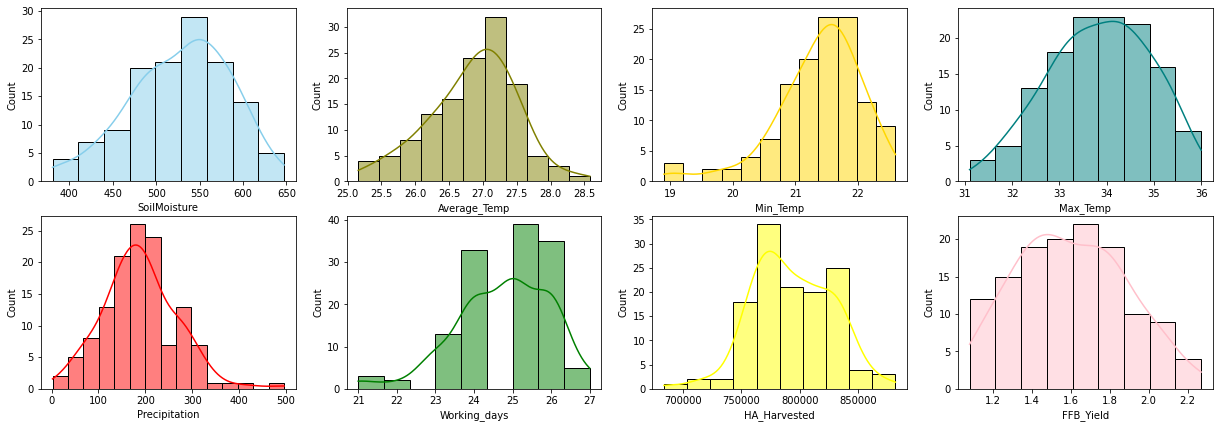

In [23]:
fig, axs = plt.subplots(2, 4, figsize=(21, 7))

sns.histplot(data=df2, x="SoilMoisture", kde=True,color="skyblue", ax=axs[0, 0])
sns.histplot(data=df2, x="Average_Temp", kde=True,color="olive", ax=axs[0, 1])
sns.histplot(data=df2, x="Min_Temp", kde=True,color="gold", ax=axs[0, 2])
sns.histplot(data=df2, x="Max_Temp", kde=True,color="teal", ax=axs[0, 3])
sns.histplot(data=df2, x="Precipitation", kde=True,color="red", ax=axs[1, 0])
sns.histplot(data=df2, x="Working_days", kde=True,color="green", ax=axs[1, 1])
sns.histplot(data=df2, x="HA_Harvested", kde=True,color="yellow", ax=axs[1, 2])
sns.histplot(data=df2, x="FFB_Yield", kde=True,color="pink", ax=axs[1, 3])

plt.show()

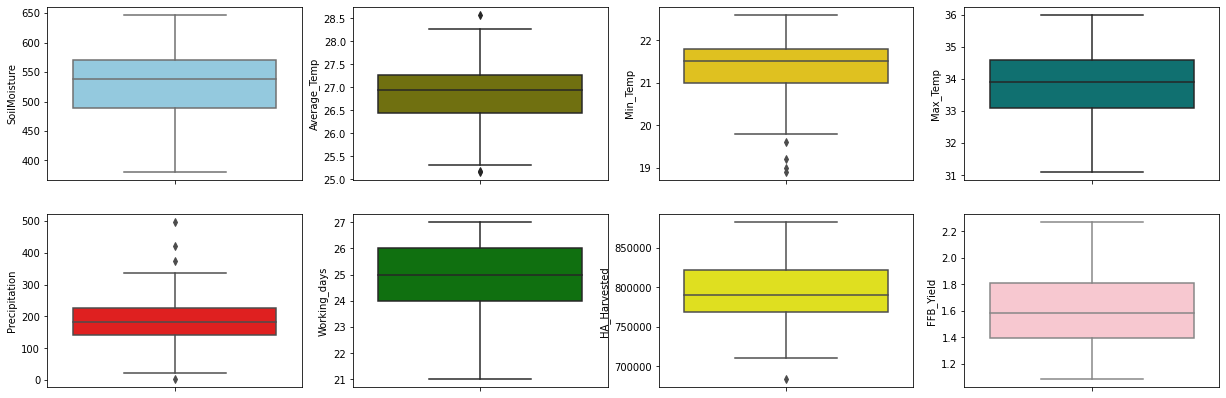

In [24]:
fig, axs = plt.subplots(2, 4, figsize=(21, 7))

sns.boxplot(data=df2, y="SoilMoisture",color="skyblue", ax=axs[0, 0])
sns.boxplot(data=df2, y="Average_Temp",color="olive", ax=axs[0, 1])
sns.boxplot(data=df2, y="Min_Temp",color="gold", ax=axs[0, 2])
sns.boxplot(data=df2, y="Max_Temp",color="teal", ax=axs[0, 3])
sns.boxplot(data=df2, y="Precipitation",color="red", ax=axs[1, 0])
sns.boxplot(data=df2, y="Working_days",color="green", ax=axs[1, 1])
sns.boxplot(data=df2, y="HA_Harvested",color="yellow", ax=axs[1, 2])
sns.boxplot(data=df2, y="FFB_Yield",color="pink", ax=axs[1, 3])

plt.show()

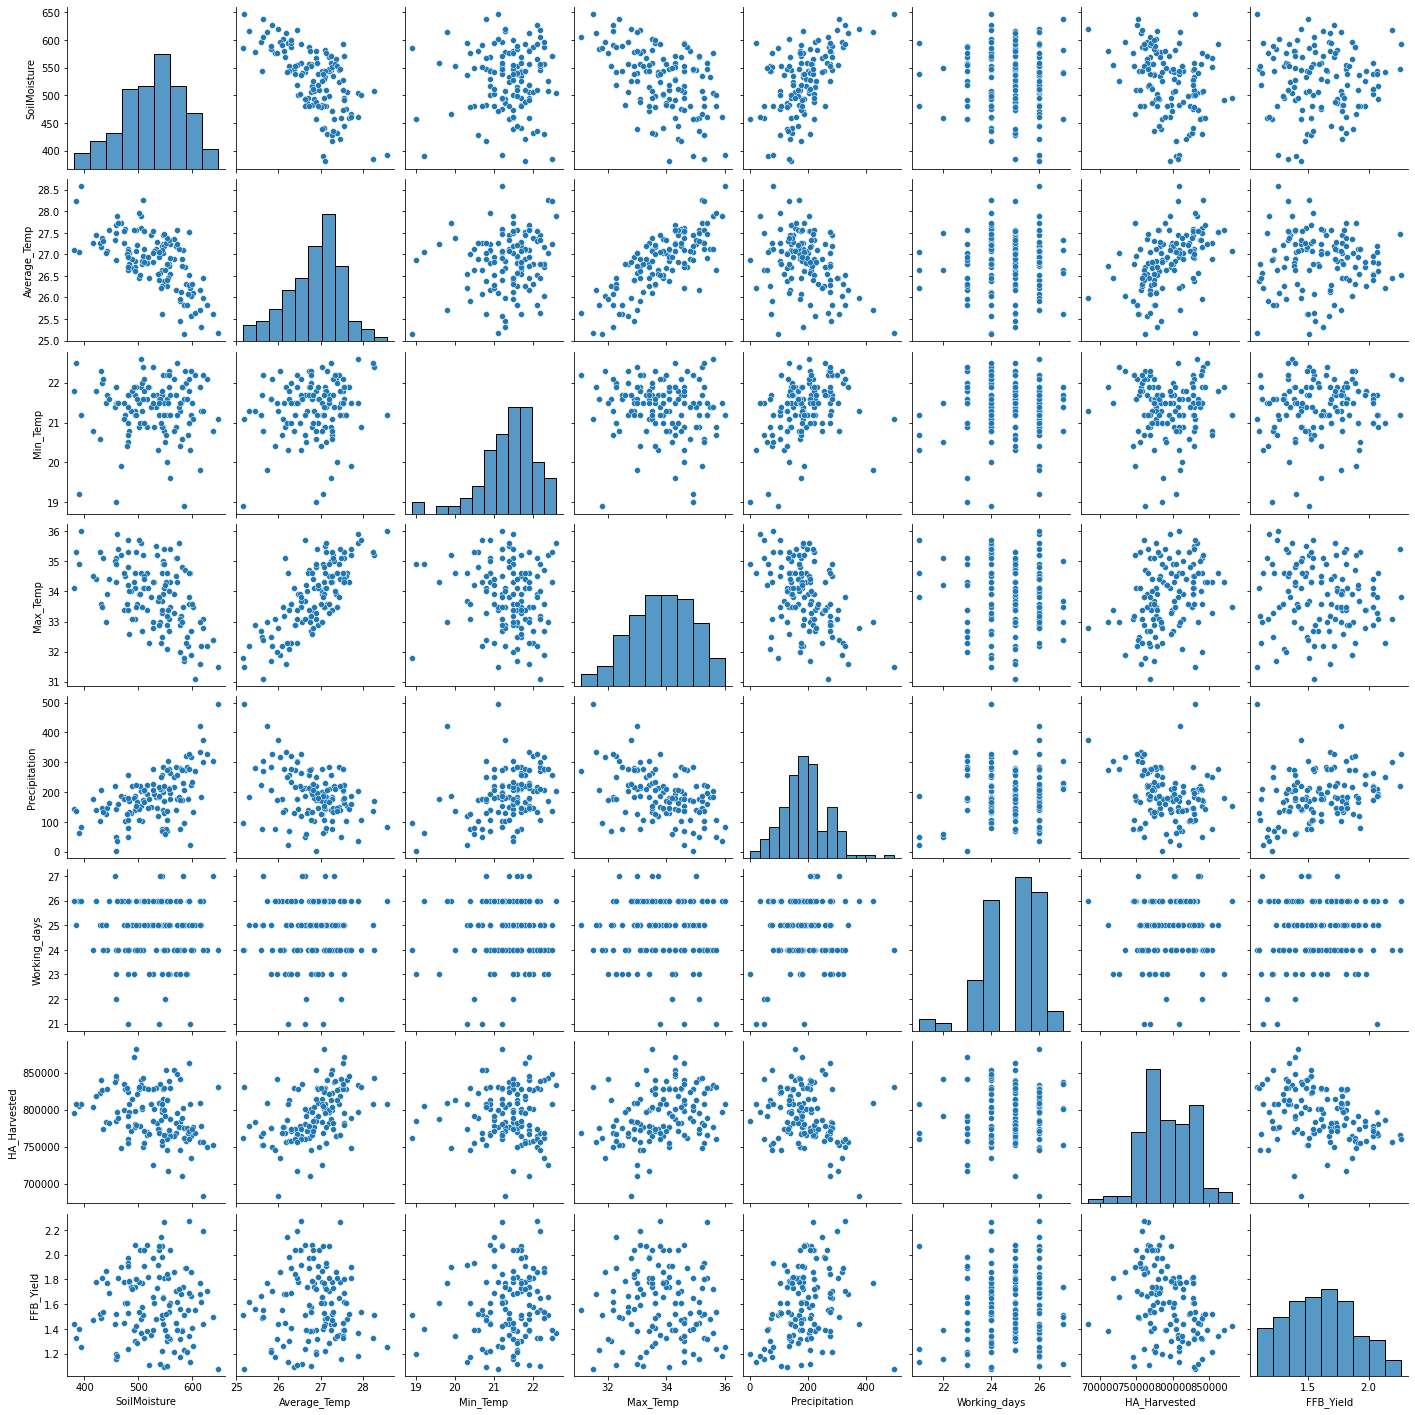

In [25]:
sns.pairplot(df2)

**Findings:**
* Most of variables except for FFB_Yield isn't really skewed *(Further transformation might not be needed)*
* Precipitation, Min_Temp, Working_days and HA_Harvested have high Kurtosis *(Getting rid of the otliers that causes the kurtosis)*
* Precipitation, Min_Temp, and HA_Harvested have noticable outliers *(Getting rid of the outliers)*
* The features is suffering from collinearity or multi-collinearity *(Use VIF)*


### Corellation Plot

In [26]:
corr = df2.corr()
corr.style.background_gradient(cmap='coolwarm')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  # This is added back by InteractiveShellApp.init_path()


,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
SoilMoisture,nan,nan,nan,nan,nan,nan,nan,nan
Average_Temp,-0.65,nan,nan,nan,nan,nan,nan,nan
Min_Temp,0.02,0.18,nan,nan,nan,nan,nan,nan
Max_Temp,-0.50,0.76,-0.12,nan,nan,nan,nan,nan
Precipitation,0.55,-0.37,0.35,-0.46,nan,nan,nan,nan
Working_days,-0.06,0.08,0.07,-0.04,0.13,nan,nan,nan
HA_Harvested,-0.33,0.45,0.02,0.31,-0.27,0.05,nan,nan
FFB_Yield,-0.00,-0.01,0.10,-0.07,0.29,0.12,-0.35,nan


**Findings:** 
From the correlation plot, I would like to classify each relations into some groups:
* High Positive Correlation (>0,75):
1. Max_Temp and Average_Temp
* High Negative Correlation (<-0,75):
1. None
* Moderate Positive Correlation (0,25<x<0,75):
1. Precipitation and Soil Moisture
1. HA_Harvested and Average_Temp
1. FFB_Yield and Precipitation
1. Precipitation and Min_Temp
1. HA_Harvested and Max_Temp
* Moderate Negative Correlation (-0,75<x<-0,25):
1. Average_Temp and Soil_Moisture
1. Soil_Moisture and Max_Temp
1. Precipitation and Average_Temp
1. Precipitation and Max_Temp
1. HA_Harvested and Soil_Moisture
1. HA_Harvested and Precipitation
* And the rest could be classified as uncorrelated
* The features is suffering from collinearity or multi-collinearity *(Use VIF)*

## **Feature Engineering**
### Removing the outliers

In [27]:
#Removing Outliers
df2 = df2[df2['Min_Temp']>=19.8]
df2 = df2[df2['Precipitation']<=350]
df2 = df2[df2['HA_Harvested']>=700000]

Another quick look to the distplot to see whether the removal of outlliers helped

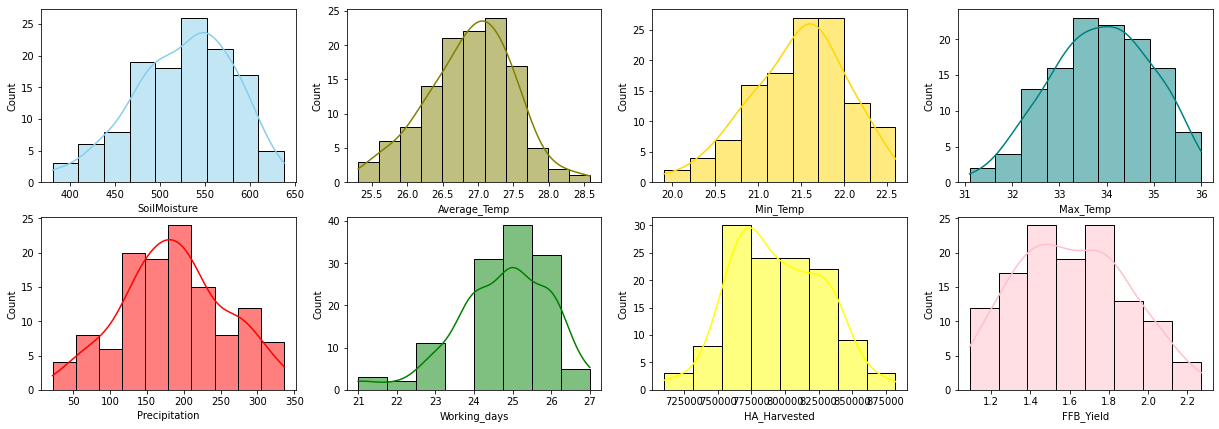

In [28]:
fig, axs = plt.subplots(2, 4, figsize=(21, 7))

sns.histplot(data=df2, x="SoilMoisture", kde=True,color="skyblue", ax=axs[0, 0])
sns.histplot(data=df2, x="Average_Temp", kde=True,color="olive", ax=axs[0, 1])
sns.histplot(data=df2, x="Min_Temp", kde=True,color="gold", ax=axs[0, 2])
sns.histplot(data=df2, x="Max_Temp", kde=True,color="teal", ax=axs[0, 3])
sns.histplot(data=df2, x="Precipitation", kde=True,color="red", ax=axs[1, 0])
sns.histplot(data=df2, x="Working_days", kde=True,color="green", ax=axs[1, 1])
sns.histplot(data=df2, x="HA_Harvested", kde=True,color="yellow", ax=axs[1, 2])
sns.histplot(data=df2, x="FFB_Yield", kde=True,color="pink", ax=axs[1, 3])

plt.show()

It helped normalizing the data

### Calculating VIF Score

I then calculate the VIF value to make sure if there are any features that are heavily correlated to one or more features that might reduce the performance of the model

In [29]:
#Calculating VIF and making a Dataframe to visualize
import pandas as pd
from sklearn.linear_model import LinearRegression
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    for feature in features:
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
   
        tolerance[feature] = 1 - r2
        vif[feature] = 1/(tolerance[feature])
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [30]:
calculate_vif(df2, features=['SoilMoisture','Average_Temp','Min_Temp','Max_Temp',
                                'Precipitation','Working_days','HA_Harvested'])

,VIF,Tolerance
SoilMoisture,2.097119,0.476845
Average_Temp,4.070918,0.245645
Min_Temp,1.495428,0.668705
Max_Temp,2.902748,0.344501
Precipitation,1.941714,0.515009
Working_days,1.059587,0.943764
HA_Harvested,1.391536,0.718630


**Findings:** The average temperature features is highly correlated to more than one other features in the dataset, and also the VIF value is pretty high. Hence, I remove this feature

In [31]:
calculate_vif(df2, features=['SoilMoisture','Min_Temp','Max_Temp',
                                'Precipitation','Working_days','HA_Harvested'])

,VIF,Tolerance
SoilMoisture,1.634871,0.611669
Min_Temp,1.348829,0.741384
Max_Temp,1.426583,0.700976
Precipitation,1.911103,0.523258
Working_days,1.042762,0.958992
HA_Harvested,1.240112,0.806379


**Findings:**
Almost all of the features are now having relatively low VIF value compared to their initial values, for now I consider them as independent variables and could be used for further analysis 

## **Modelling**

### Linear Regression
* Dropping Average_Temp
* Normalizing the data by MinMax so there won't be any scalability issues with linear regression coefficients

In [32]:
df2_1 = df2.drop("Average_Temp", axis=1)
df2_1 = df2_1.drop("Date", axis=1)
normdf2_1 = (df2_1 - df2_1.min())/(df2_1.max()-df2_1.min())
normdf2_2 = normdf2_1
normdf2_1 = pd.concat([df2['Date'],normdf2_1],axis=1)
normdf2_1['Month'] = pd.DatetimeIndex(normdf2_1['Date']).day
normdf2_1 = normdf2_1.drop("Date", axis=1)
normdf2_1=pd.get_dummies(normdf2_1, columns=["Month"])

Making model, and fitting the data

In [33]:
from sklearn.linear_model import LinearRegression
X=normdf2_2.drop('FFB_Yield', axis=1)
y=normdf2_2['FFB_Yield']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.10, random_state=101)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print("The accuracy score of the model:", lin_reg.score(X_test, y_test))

The accuracy score of the model: 0.29608389252608247


**Findings:**
The accuracy score is bad, I'll use other method of regression and use this result as a base

Finding feature importance from the linear regression model displaying it in table and graph

In [34]:
importance_lin_reg = lin_reg.coef_
# summarize feature importance
feature_importances_lin_reg = pd.DataFrame(importance_lin_reg,index = X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances_lin_reg

,importance
Precipitation,0.508008
Max_Temp,0.081691
Working_days,0.059535
Min_Temp,-0.183815
SoilMoisture,-0.339246
HA_Harvested,-0.468621


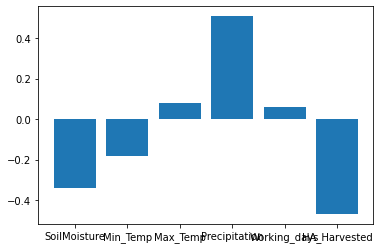

In [35]:
from matplotlib import pyplot
pyplot.bar(X_train.columns, importance_lin_reg)
pyplot.show()

**Findings:**
* The 3 features with highest importance are: Precipitation, HA_Harvested and SoilMoisture

### Random Forest Regressor

Random forest is well known to be pretty robust but tend to overfit. To cover for the lack of accuracy from the linear regression model, I'll use Random Forest Regressor

Side note: I also added month as a feature since i believe that it might be useful

In [36]:
normdf2_1.head()

,SoilMoisture,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,0.916764,0.518519,0.224490,0.516714,0.666667,0.393706,0.449153,1,0,0,0,0,0,0,0,0,0,0,0
1,0.732011,0.370370,0.816327,0.375995,0.333333,0.336892,0.305085,0,1,0,0,0,0,0,0,0,0,0,0
2,0.765850,0.518519,0.367347,0.822350,0.666667,0.429532,0.398305,0,0,1,0,0,0,0,0,0,0,0,0
3,0.779463,0.259259,0.755102,0.481375,0.666667,0.458752,0.254237,0,0,0,1,0,0,0,0,0,0,0,0
4,0.640607,0.370370,0.795918,0.377268,0.666667,0.601932,0.296610,0,0,0,0,1,0,0,0,0,0,0,0


Putting the importance score into a table and a graph

In [37]:
# random forest for feature importance on a regression problem
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot

X1=normdf2_1.drop('FFB_Yield', axis=1)
y1=normdf2_1['FFB_Yield']

from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,test_size=0.30, random_state=101)


# define the model
rf = RandomForestRegressor()
# fit the model
model = rf.fit(X1, y1)
# get importance
importance = rf.feature_importances_
# summarize feature importance
feature_importances = pd.DataFrame(importance,index = X_train1.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
HA_Harvested,0.278588
Precipitation,0.149020
SoilMoisture,0.105019
Month_2,0.090452
Max_Temp,0.087572
Month_10,0.062062
Min_Temp,0.045732
Month_1,0.045691
Month_9,0.030988
Month_7,0.026764


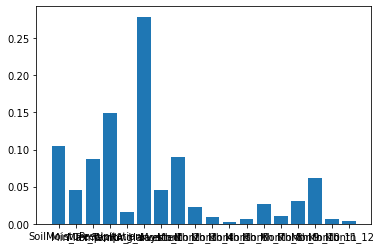

In [38]:
pyplot.bar(X_train1.columns, importance)
pyplot.show()

In [39]:
print ("This model has an accuracy score of:", model.score(X_test1, y_test1))

This model has an accuracy score of: 0.9332632387597285


**Findings:**
* The 3 features with highest importance are: Precipitation, HA_Harvested and SoilMoisture
* Month of the year is also showing pretty interesting pattern as some months are really affecting the yields and some doesn't
* for the top features that affects the yield, the Random Forest Regressor agrees with the Linear Model which is nice


## **Conclusion**
**Final Findings:**
* The 3 features with highest importance score: Precipitation, HA_Harvested and SoilMoisture
* Precipitation is positively correlated with yield and the other two are negatively correlated
* HA_Harvested being important is strange, since the FFB_Yield has a unit of Tonnes/HA

# **QUESTION 3**

## **Preliminary**

Putting the pharagraph into a string

In [40]:
string = """As a term, data analytics predominantly refers to an assortment of applications, from basic business 
intelligence (BI), reporting and online analytical processing (OLAP) to various forms of advanced
analytics. In that sense, it's similar in nature to business analytics, another umbrella term for
approaches to analyzing data -- with the difference that the latter is oriented to business uses, while
data analytics has a broader focus. The expansive view of the term isn't universal, though: In some
cases, people use data analytics specifically to mean advanced analytics, treating BI as a separate
category.  Data analytics initiatives can help businesses increase revenues, improve operational
efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to
emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of
boosting business performance. Depending on the particular application, the data that's analyzed
can consist of either historical records or new information that has been processed for real-time
analytics uses. In addition, it can come from a mix of internal systems and external data sources.  At
a high level, data analytics methodologies include exploratory data analysis (EDA), which aims to find
patterns and relationships in data, and confirmatory data analysis (CDA), which applies statistical
techniques to determine whether hypotheses about a data set are true or false. EDA is often
compared to detective work, while CDA is akin to the work of a judge or jury during a court trial -- a
distinction first drawn by statistician John W. Tukey in his 1977 book Exploratory Data Analysis.  Data
analytics can also be separated into quantitative data analysis and qualitative data analysis. The
former involves analysis of numerical data with quantifiable variables that can be compared or
measured statistically. The qualitative approach is more interpretive -- it focuses on understanding
the content of non-numerical data like text, images, audio and video, including common phrases,
themes and points of view."""

In [41]:
string

"As a term, data analytics predominantly refers to an assortment of applications, from basic business \nintelligence (BI), reporting and online analytical processing (OLAP) to various forms of advanced\nanalytics. In that sense, it's similar in nature to business analytics, another umbrella term for\napproaches to analyzing data -- with the difference that the latter is oriented to business uses, while\ndata analytics has a broader focus. The expansive view of the term isn't universal, though: In some\ncases, people use data analytics specifically to mean advanced analytics, treating BI as a separate\ncategory.  Data analytics initiatives can help businesses increase revenues, improve operational\nefficiency, optimize marketing campaigns and customer service efforts, respond more quickly to\nemerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of\nboosting business performance. Depending on the particular application, the data that's analyzed\nca

Cleaning the string from unwanted characters, such as line-breaks (\n), punctuation and transforming to all lowercase.

In [42]:
string = string.replace("\n"," ")
string = string.replace("--","")
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
for x in string:
    if x in punc:
        string = string.replace(x, "")
string.lower()

'as a term data analytics predominantly refers to an assortment of applications from basic business  intelligence bi reporting and online analytical processing olap to various forms of advanced analytics in that sense its similar in nature to business analytics another umbrella term for approaches to analyzing data  with the difference that the latter is oriented to business uses while data analytics has a broader focus the expansive view of the term isnt universal though in some cases people use data analytics specifically to mean advanced analytics treating bi as a separate category  data analytics initiatives can help businesses increase revenues improve operational efficiency optimize marketing campaigns and customer service efforts respond more quickly to emerging market trends and gain a competitive edge over rivals  all with the ultimate goal of boosting business performance depending on the particular application the data thats analyzed can consist of either historical records 

Seems like we're good to go

## **Question 3a.**
counting number of words in the paragraph 

In [43]:
x = len(string.split())
print("Number of word in the paragraph:", x)

Number of word in the paragraph: 315


In [44]:
y = string.count('data')
a = (y/x)
print("Probability of word 'data':","{:.2%}".format(a))

Probability of word 'data': 4.76%


## **Question 3b.**

In [45]:
z=len(set(string.split()))
b=(z/x)
print("Probability of unique word used in the paragraph:","{:.2%}".format(b))

Probability of unique word used in the paragraph: 63.17%


## **Question 3c.**

In [46]:
c = string.count('data analytics')
d = string.count('analytics')
e = (c/d)
print("Probability of 'analytics' occuring after 'data':","{:.2%}".format(e))

Probability of 'analytics' occuring after 'data': 40.00%
